In [10]:
import matplotlib.pyplot as plt
import csv

panda = 'panda'
festive = 'festive'
tobasco = 'tobasco'

adaptation = 'adaptation'
buffer = 'buffer'
bufferUnderrun = 'bufferUnderrun'
download = 'download'
playback = 'playback'
throughput = 'throughput'


In [11]:
def getRows(isQuic, algo, simulationId, kind):
    if isQuic:
        quic = 'quic-'
    else:
        quic = ''
    # get file
    with open(quic + 'dash-log-files/' + algo + '/1/sim' + str(simulationId) + '_cl0_' + kind + 'Log.txt', 'r') as file:
        plots = csv.reader(file)
        rows = []
        for row in plots:
            rows.append(row)
    
    
    schemas = rows[0][0].split()
    columnSizes = []
    columns = []
    schemaIndex = 0
    for schema in schemas:
        size = len(schema)
        #print(size)

        if rows[0][0].find(schema) != schemaIndex:
            columnSizes.append(size + rows[0][0].find(schema) - schemaIndex)
            schemaIndex = size + rows[0][0].find(schema) + 1
            
        else:
            columnSizes.append(size)
            schemaIndex = schemaIndex+  size + 1
        
        
        c = []
        columns.append(c)

    del rows[0]

    for row in rows:
        temp = row[0]
        index = 0
        for i in range(len(columnSizes)):
            columnSize = columnSizes[i]
            tempString = temp[index:index+columnSize]
            if '.' in tempString:
                tempValue = float(tempString)
            elif 'Y' in tempString:
                continue
            else:
                tempValue = int(tempString)
            
            columns[i].append(tempValue)
            index = index + columnSize + 1
    return columns

In [12]:
def getLogs(isQuic,algo, simulationId):
    ret = []
    ret.append(getRows(isQuic,algo,simulationId=simulationId, kind = adaptation))
    ret.append(getRows(isQuic,algo,simulationId=simulationId, kind = buffer))
    ret.append(getRows(isQuic,algo,simulationId=simulationId, kind = bufferUnderrun))
    ret.append(getRows(isQuic,algo,simulationId=simulationId, kind = download))
    ret.append(getRows(isQuic,algo,simulationId=simulationId, kind = playback))
    ret.append(getRows(isQuic,algo,simulationId=simulationId, kind = throughput))
    return ret

In [13]:
def getAllLogs(isQuic,simulationId):
    ret = []
    ret.append(getLogs(isQuic,tobasco,simulationId))
    ret.append(getLogs(isQuic,festive,simulationId))
    ret.append(getLogs(isQuic,panda,simulationId))
    return ret

In [14]:
def getMeanVideoQuality(allLogs):
    q = []
    for logs in allLogs:
        playbackLog = logs[4]
        videoQualityList = playbackLog[2]
        average = sum(videoQualityList, 0)/len(videoQualityList)
        q.append(average)
    plt.plot([tobasco,festive,panda],q,'ro')
    plt.ylim((0,8))
    plt.show()
    return q

In [15]:
def getMeanBuffer(allLogs):
    q = []
    for logs in allLogs:
        bufferLog = logs[1]
        bufferLevelList = bufferLog[1]
        average = sum(bufferLevelList, 0 ) / len(bufferLevelList)
        q.append(average)
    plt.plot([tobasco,festive,panda],q,'ro')
    plt.ylim((0, 40))
    plt.show()
    return q

In [16]:
def getThroughput(allLogs):
    q = []
    index = 1  
    for logs in allLogs:
        throughputLog = logs[5]
        timeNowList = throughputLog[0]
        bytesReceivedList = throughputLog[1]
        throughputList = []
        throughput = 0
        for bytesReceived in bytesReceivedList:
            throughput = throughput + bytesReceived
            throughputList.append(throughput)
        plt.subplot(3,1,index)
        index = index + 1
        plt.plot(timeNowList,throughputList, 'r-')
        
    plt.show()
    return q

In [17]:
def getBoxPlot(allLogs):
    q = []
    for logs in allLogs:
        playbackLog = logs[4]
        videoQualityList = playbackLog[2]
        q.append(videoQualityList)
    fig, ax = plt.subplots()
    ax.boxplot(q)
    ax.set_ylim(0,8)
    plt.show()
    
    return q

In [18]:
quicLogs = getAllLogs(True,1)
tcpLogs = getAllLogs(False,1)

In [19]:
def getQualityPlots(quicLogs,tcpLogs):
    q = []
    for logs in quicLogs:
        playbackLog = logs[4]
        videoQualityList = playbackLog[2]
        average = sum(videoQualityList, 0)/len(videoQualityList)
        q.append(average)
    t = []
    for logs in tcpLogs:
        playbackLog = logs[4]
        videoQualityList = playbackLog[2]
        average = sum(videoQualityList, 0)/len(videoQualityList)
        t.append(average)
    algorithms = [tobasco,festive,panda]

    
    plt.bar(x=algorithms,height=q,align='edge',width=0.3,label='QUIC')
    plt.bar(x=algorithms,height=t,align='edge',width=-0.3,label='TCP')
    
    plt.xlabel("Algorithm")
    plt.ylabel("Average Video Quality")
    plt.legend(loc=(1.0,1.0))
    plt.ylim(0,7)
    plt.show()
    

In [20]:
def getTransitionPlots(quicLogs,tcpLogs):
    q = []
    for logs in quicLogs:
        playbackLog = logs[4]
        videoQualityList = playbackLog[2]
        quality = videoQualityList[0]
        transitionCount = 0
        for videoQuality in videoQualityList:
            if quality != videoQuality:
                transitionCount = transitionCount + 1
            quality = videoQuality
        transitionRate = transitionCount/len(videoQualityList)
        q.append(transitionRate)
    t = []
    for logs in tcpLogs:
        playbackLog = logs[4]
        videoQualityList = playbackLog[2]
        quality = videoQualityList[0]
        transitionCount = 0
        for videoQuality in videoQualityList:
            if quality != videoQuality:
                transitionCount = transitionCount + 1
            quality = videoQuality
        transitionRate = transitionCount/len(videoQualityList)
        t.append(transitionRate)
    algorithms = [tobasco,festive,panda]
    
    plt.bar(x=algorithms,height=q,align='edge',width=0.3,label='QUIC')
    plt.bar(x=algorithms,height=t,align='edge',width=-0.3,label='TCP')
    
    plt.xlabel("Algorithm")
    plt.ylabel("Transition Rate")

    plt.legend(loc=(1.0,1.0))
    plt.ylim(0,0.2)
    plt.show()

In [21]:
def getBufferPlots(quicLogs,tcpLogs):
    q = []
    for logs in quicLogs:
        bufferLog = logs[1]
        bufferLevelList = bufferLog[1]
        average = sum(bufferLevelList, 0 ) / len(bufferLevelList)
        q.append(average)
    t = []
    for logs in tcpLogs:
        bufferLog = logs[1]
        bufferLevelList = bufferLog[1]
        average = sum(bufferLevelList, 0 ) / len(bufferLevelList)
        t.append(average)
    algorithms = [tobasco,festive,panda]
    
    plt.bar(x=algorithms,height=q,align='edge',width=0.3,label='QUIC')
    plt.bar(x=algorithms,height=t,align='edge',width=-0.3,label='TCP')
    
    plt.xlabel("Algorithm")
    plt.ylabel("Average Buffer")
    plt.legend(loc=(1.0,1.0))
    plt.show()

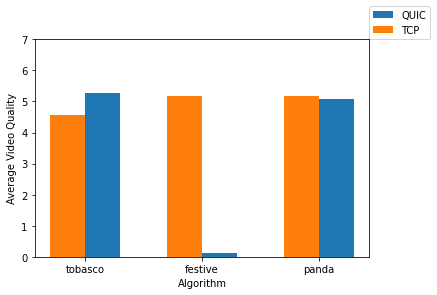

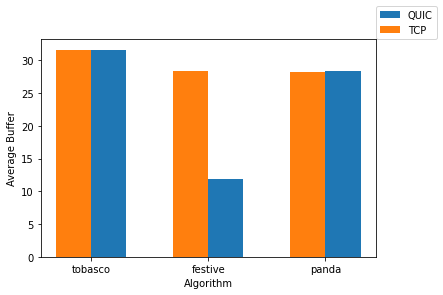

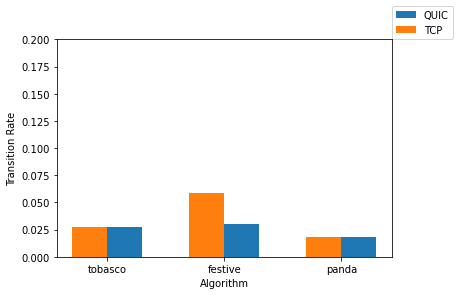

In [22]:
getQualityPlots(quicLogs,tcpLogs)
getBufferPlots(quicLogs,tcpLogs)
getTransitionPlots(quicLogs,tcpLogs)

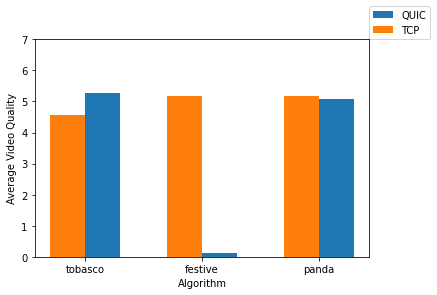

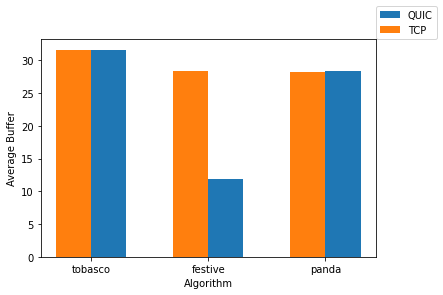

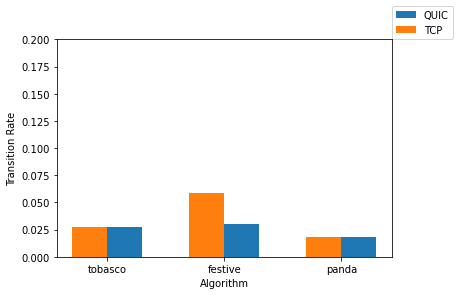

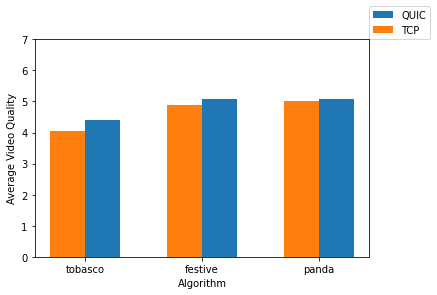

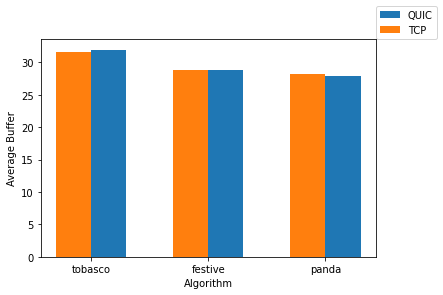

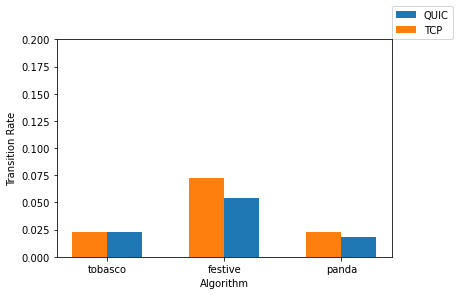

In [23]:
def getPlots(simulationId):
    quicLogs = getAllLogs(True,simulationId)
    tcpLogs = getAllLogs(False,simulationId)
    getQualityPlots(quicLogs,tcpLogs)
    getBufferPlots(quicLogs,tcpLogs)
    getTransitionPlots(quicLogs,tcpLogs)

getPlots(1)
getPlots(5)


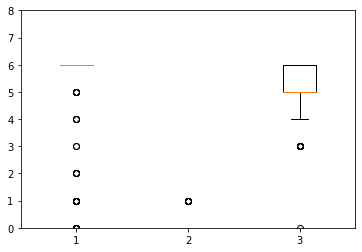

In [24]:
boxplot = getBoxPlot(quicLogs)

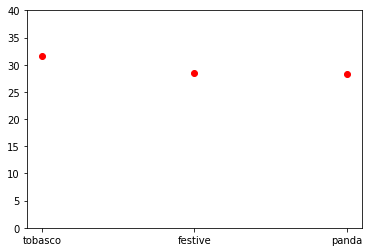

In [25]:
mb = getMeanBuffer(tcpLogs)

In [29]:
quicfestiveLogs = getLogs(True,festive,20)
tcpfestiveLogs = getLogs(False,festive,20)


playbackLog = quicfestiveLogs[4]
videoQualityList = playbackLog[2]
average = sum(videoQualityList, 0)/len(videoQualityList)
print(average)
playbackLog = tcpfestiveLogs[4]
videoQualityList = playbackLog[2]
average = sum(videoQualityList, 0)/len(videoQualityList)
print(average)

3.635135135135135
3.554054054054054


In [31]:
playbackLog = quicfestiveLogs[4]
videoQualityList = playbackLog[2]
quality = videoQualityList[0]
transitionCount = 0
for videoQuality in videoQualityList:
    if quality != videoQuality:
        transitionCount = transitionCount + 1
    quality = videoQuality
transitionRate = transitionCount/len(videoQualityList)
print(transitionRate)

playbackLog = tcpfestiveLogs[4]
videoQualityList = playbackLog[2]
quality = videoQualityList[0]
transitionCount = 0
for videoQuality in videoQualityList:
    if quality != videoQuality:
        transitionCount = transitionCount + 1
    quality = videoQuality
transitionRate = transitionCount/len(videoQualityList)
print(transitionRate)

0.18018018018018017
0.15315315315315314
